In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
seasons = ['2017-2018', '2018-2019', '2019-2020']
df = pd.DataFrame()

for ind, season in enumerate(seasons) :
  # Basic Stats
  url = 'https://fbref.com/en/comps/Big5/'+season+'/'+season+'-Big-5-European-Leagues-Stats'

  response = requests.get(url)
  html = response.text
  soup = BeautifulSoup(html, 'html.parser')
  tables = soup.find_all(name='table')
  for table in tables :
    headers = [th.text for th in table.find_all('th')]

  table = tables[0]
  headers = [th.text for th in table.find_all('th')]

  df_stat = pd.DataFrame(columns=headers[1:20])

  for i in table.find_all('tr')[1:] :
    data = i.find_all('td')
    row = [tr.text.strip() for tr in data]
    df_stat.loc[len(df_stat)] = row
    
  df_stat = df_stat.set_index('Squad', drop=True).rename_axis(None).sort_index()
  df_stat = df_stat.drop(columns=['Country', 'Top Team Scorer',	'Goalkeeper'])
  df_stat['Attendance'] = df_stat['Attendance'].str.replace(",", "")
  df_stat = df_stat.apply(pd.to_numeric)
  df_stat['WinRate'] = df_stat['W']/df_stat['MP']
  df_stat = df_stat.drop(columns=['LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90'])

  # Goalkeeping Stats
  url = 'https://fbref.com/en/comps/Big5/'+season+'/keepers/squads/'+season+'-Big-5-European-Leagues-Stats'

  response = requests.get(url)
  html = response.text
  soup = BeautifulSoup(html, 'html.parser')
  tables = soup.find_all(name='table')
  for table in tables :
    headers = [th.text for th in table.find_all('th')]

  table = tables[0]
  headers = [th.text for th in table.find_all('th')]

  df_goalkeep = pd.DataFrame(columns=headers[5:27])

  for i in table.find_all('tr')[2:] :
    data = i.find_all('td')
    row = [tr.text.strip() for tr in data]
    df_goalkeep.loc[len(df_goalkeep)] = row

  df_goalkeep = df_goalkeep.set_index('Squad', drop=True).rename_axis(None).sort_index()
  df_goalkeep = df_goalkeep.drop(columns=['Comp'])
  df_goalkeep['Min'] = df_goalkeep['Min'].str.replace(",", "")
  df_goalkeep = df_goalkeep.apply(pd.to_numeric)
  df_goalkeep = df_goalkeep.drop(columns=['# Pl', 'MP', 'Starts', 'Min', '90s', 'GA', 'GA90', 'W', 'D', 'L'])
  df_goalkeep.columns = ['SoTA', 'Saves', 'Save%', 'CS', 'CS%', 'PK_PKatt', 'PKA', 'PKsv', 'PKm', 'PK_Save%']

  # Shooting Stats
  url = 'https://fbref.com/en/comps/Big5/'+season+'/shooting/squads/'+season+'-Big-5-European-Leagues-Stats'

  response = requests.get(url)
  html = response.text
  soup = BeautifulSoup(html, 'html.parser')
  tables = soup.find_all(name='table')
  for table in tables :
    headers = [th.text for th in table.find_all('th')]

  table = tables[0]
  headers = [th.text for th in table.find_all('th')]

  df_shoot = pd.DataFrame(columns=headers[5:26])

  for i in table.find_all('tr')[2:] :
    data = i.find_all('td')
    row = [tr.text.strip() for tr in data]
    df_shoot.loc[len(df_shoot)] = row

  df_shoot = df_shoot.set_index('Squad', drop=True).rename_axis(None).sort_index()
  df_shoot = df_shoot.drop(columns=['Comp'])
  df_shoot = df_shoot.apply(pd.to_numeric)
  df_shoot = df_shoot.drop(columns=['# Pl', '90s', 'Gls', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG'])

  # Passing Stats
  url = 'https://fbref.com/en/comps/Big5/'+season+'/passing/squads/'+season+'-Big-5-European-Leagues-Stats'

  response = requests.get(url)
  html = response.text
  soup = BeautifulSoup(html, 'html.parser')
  tables = soup.find_all(name='table')
  for table in tables :
    headers = [th.text for th in table.find_all('th')]

  table = tables[0]
  headers = [th.text for th in table.find_all('th')]

  df_pass = pd.DataFrame(columns=headers[8:34])

  for i in table.find_all('tr')[2:] :
    data = i.find_all('td')
    row = [tr.text.strip() for tr in data]
    df_pass.loc[len(df_pass)] = row

  df_pass = df_pass.set_index('Squad', drop=True).rename_axis(None).sort_index()
  df_pass = df_pass.drop(columns=['Comp'])
  df_pass = df_pass.apply(pd.to_numeric)
  df_pass = df_pass.drop(columns=['# Pl', '90s', 'Ast', 'xA', 'A-xA'])
  df_pass.columns = ['T_Cmp', 'T_Att', 'T_Cmp%', 'Pass_TotDist', 'Pass_PrgDist', 'S_Cmp', 'S_Att', 'S_Cmp%', 'M_Cmp', 'M_Att', 'M_Cmp%', 'L_Cmp', 'L_Att', 'L_Cmp%', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog']

  # Goal and Shot Creation Stats
  url = 'https://fbref.com/en/comps/Big5/'+season+'/gca/squads/'+season+'-Big-5-European-Leagues-Stats'

  response = requests.get(url)
  html = response.text
  soup = BeautifulSoup(html, 'html.parser')
  tables = soup.find_all(name='table')
  for table in tables :
    headers = [th.text for th in table.find_all('th')]

  table = tables[0]
  headers = [th.text for th in table.find_all('th')]

  df_gca = pd.DataFrame(columns=headers[7:27])

  for i in table.find_all('tr')[2:] :
    data = i.find_all('td')
    row = [tr.text.strip() for tr in data]
    df_gca.loc[len(df_gca)] = row

  df_gca = df_gca.set_index('Squad', drop=True).rename_axis(None).sort_index()
  df_gca = df_gca.drop(columns=['Comp'])
  df_gca = df_gca.apply(pd.to_numeric)
  df_gca = df_gca.drop(columns=['# Pl', '90s'])
  df_gca.columns = ['SCA', 'SCA90', 'S_PassLive', 'S_PassDead', 'S_Drib', 'S_Sh', 'S_Fld', 'S_Def', 'GCA', 'GCA90', 'G_PassLive', 'G_PassDead', 'G_Drib', 'G_Sh', 'G_Fld', 'G_Def']
  df_gca = df_gca.drop(columns=['GCA', 'GCA90', 'G_PassLive', 'G_PassDead', 'G_Drib', 'G_Sh', 'G_Fld', 'G_Def'])

  # Defensive Actions Stats
  url = 'https://fbref.com/en/comps/Big5/'+season+'/defense/squads/'+season+'-Big-5-European-Leagues-Stats'

  response = requests.get(url)
  html = response.text
  soup = BeautifulSoup(html, 'html.parser')
  tables = soup.find_all(name='table')
  for table in tables :
    headers = [th.text for th in table.find_all('th')]

  table = tables[0]
  headers = [th.text for th in table.find_all('th')]

  df_defense = pd.DataFrame(columns=headers[8:35])

  for i in table.find_all('tr')[2:] :
    data = i.find_all('td')
    row = [tr.text.strip() for tr in data]
    df_defense.loc[len(df_defense)] = row

  df_defense = df_defense.set_index('Squad', drop=True).rename_axis(None).sort_index()
  df_defense = df_defense.drop(columns=['Comp'])
  df_defense = df_defense.apply(pd.to_numeric)
  df_defense = df_defense.drop(columns=['# Pl', '90s'])
  df_defense.columns = ['Tkl', 'TklW', 'T_Def 3rd', 'T_Mid 3rd', 'T_Att 3rd', 'D_Tkl', 'D_Tkl+Past', 'Tkl%', 'Past', 'Press', 'Press_Succ', '%', 'P_Def 3rd', 'P_Mid 3rd', 'P_Att 3rd', 'Blocks', 'Block_Sh', 'ShSv', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err']

  # Possession Stats
  url = 'https://fbref.com/en/comps/Big5/'+season+'/possession/squads/'+season+'-Big-5-European-Leagues-Stats'

  response = requests.get(url)
  html = response.text
  soup = BeautifulSoup(html, 'html.parser')
  tables = soup.find_all(name='table')
  for table in tables :
    headers = [th.text for th in table.find_all('th')]

  table = tables[0]
  headers = [th.text for th in table.find_all('th')]

  df_possess = pd.DataFrame(columns=headers[7:36])

  for i in table.find_all('tr')[2:] :
    data = i.find_all('td')
    row = [tr.text.strip() for tr in data]
    df_possess.loc[len(df_possess)] = row

  df_possess = df_possess.set_index('Squad', drop=True).rename_axis(None).sort_index()
  df_possess = df_possess.drop(columns=['Comp'])
  df_possess = df_possess.apply(pd.to_numeric)
  df_possess = df_possess.drop(columns=['# Pl', '90s'])
  df_possess.columns = ['Poss', 'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen', 'Live', 'Succ', 'Att', 'Succ%', '#Pl', 'Megs', 'Carries', 'TotDist', 'PrgDist', 'Carry_Prog', 'Carry_1/3', 'CPA', 'Mis', 'Dis', 'Targ', 'Rec', 'Rec%', 'Receive_Prog']

  # Miscellaneous Stats
  url = 'https://fbref.com/en/comps/Big5/'+season+'/misc/squads/'+season+'-Big-5-European-Leagues-Stats'

  response = requests.get(url)
  html = response.text
  soup = BeautifulSoup(html, 'html.parser')
  tables = soup.find_all(name='table')
  for table in tables :
    headers = [th.text for th in table.find_all('th')]

  table = tables[0]
  headers = [th.text for th in table.find_all('th')]

  df_misc = pd.DataFrame(columns=headers[5:25])

  for i in table.find_all('tr')[2:] :
    data = i.find_all('td')
    row = [tr.text.strip() for tr in data]
    df_misc.loc[len(df_misc)] = row

  df_misc = df_misc.set_index('Squad', drop=True).rename_axis(None).sort_index()
  df_misc = df_misc.drop(columns=['Comp'])
  df_misc = df_misc.apply(pd.to_numeric)
  df_misc = df_misc.drop(columns=['# Pl', '90s', 'Int', 'TklW'])

  df_season = pd.concat((df_stat, df_goalkeep, df_shoot, df_pass, df_gca, df_defense, df_possess, df_misc), axis=1)
  df = pd.concat((df, df_season))
  print(ind)

0
1
2


In [ ]:
df.to_csv('df_football.csv', encoding='utf-8-sig')
df = df.dropna()
df

,Attendance,WinRate,SoTA,Saves,Save%,CS,CS%,PK_PKatt,PKA,PKsv,PKm,PK_Save%,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,T_Cmp,T_Att,T_Cmp%,Pass_TotDist,Pass_PrgDist,S_Cmp,S_Att,S_Cmp%,M_Cmp,M_Att,M_Cmp%,L_Cmp,L_Att,L_Cmp%,KP,1/3,PPA,...,Err,Poss,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Succ,Att,Succ%,#Pl,Megs,Carries,TotDist,PrgDist,Carry_Prog,Carry_1/3,CPA,Mis,Dis,Targ,Rec,Rec%,Receive_Prog,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,PKwon,PKcon,OG,Recov,Won,Lost,Won%
Alavés,18845,0.394737,177,136,75.7,12,31.6,11,7,3,1,30.0,393,137,34.9,10.34,3.61,0.10,0.28,18.3,22,1,3,9346,13461,69.4,190290,78386,3814,4784,79.7,3832,5009,76.5,1581,3252,48.6,266,817,193,...,10,39.8,17627,2150,6162,8241,4235,639,16164,358,552,64.9,395,23,10639,52772,26536,1004,322,110,448,370,11683,9346,80.0,1243,105.0,4.0,4,614,531,111,371,3,10,2,3509,376,381,49.7
Athletic Club,37246,0.263158,161,118,71.4,11,28.9,6,3,3,0,50.0,434,150,34.6,11.42,3.95,0.08,0.22,15.4,10,6,8,12708,17079,74.4,271525,97224,4455,5570,80.0,5756,7019,82.0,2390,4088,58.5,315,1188,313,...,10,49.7,21099,2132,6403,10287,5825,855,19702,324,548,59.1,361,26,13660,74758,39197,1551,507,108,456,334,15390,12708,82.6,1608,93.0,0.0,0,538,495,107,538,7,6,3,3627,440,337,56.6
Atlético Madrid,52707,0.605263,129,109,83.7,23,60.5,4,1,3,0,75.0,416,152,36.5,10.95,4.00,0.13,0.35,17.3,12,4,5,14162,18218,77.7,263545,94131,6334,7435,85.2,5786,6937,83.4,1839,3341,55.0,298,1153,271,...,13,47.3,22528,2086,7072,10958,5949,845,21203,365,594,61.4,407,25,15484,76000,38921,1576,491,150,454,388,16640,14162,85.1,1592,93.0,5.0,3,541,483,110,350,3,4,0,3591,340,288,54.1
Barcelona,67142,0.736842,136,109,80.1,19,50.0,2,2,0,0,0.0,581,264,45.4,15.29,6.95,0.16,0.35,15.9,59,3,5,21306,24812,85.9,389761,119736,9338,10408,89.7,9224,10257,89.9,2512,3543,70.9,418,1723,513,...,12,63.1,28834,2273,7716,14165,9030,1389,27625,617,953,64.7,673,35,22156,109504,58996,2436,826,252,444,401,23805,21306,89.5,2023,67.0,2.0,0,390,528,136,383,4,2,0,3158,242,179,57.5
Betis,46781,0.473684,153,99,62.1,13,34.2,4,3,1,0,25.0,412,161,39.1,10.84,4.24,0.13,0.34,18.4,21,2,3,17395,21045,82.7,339463,103592,6739,7725,87.2,8207,9279,88.4,2330,3674,63.4,310,1235,249,...,11,57.7,24882,2519,8155,12664,5697,694,23696,392,580,67.6,417,24,18494,93912,48719,1843,573,153,459,367,19397,17395,89.7,1473,90.0,3.0,1,474,498,63,375,1,1,4,3173,258,304,45.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Watford,15353,0.210526,166,109,66.3,9,23.7,9,8,1,0,11.1,410,114,27.8,10.79,3.00,0.07,0.25,16.5,18,7,8,11208,15407,72.7,221889,84866,4849,5746,84.4,4286,5331,80.4,1790,3639,49.2,287,889,268,...,12,42.5,19952,2259,6459,9064,5455,877,18176,360,618,58.3,382,15,11603,54910,29135,1198,361,145,448,411,14093,11208,79.5,1305,80.0,3.0,2,481,342,68,488,7,9,3,3696,803,794,50.3
Werder Bremen,26413,0.235294,175,109,61.1,4,11.8,1,1,0,0,0.0,419,135,32.2,12.32,3.97,0.09,0.27,17.7,10,3,6,12979,16581,78.3,260600,90656,4973,5759,86.4,5668,6622,85.6,2125,3530,60.2,311,921,249,...,10,48.8,20864,2519,7265,10088,4783,704,19079,278,487,57.1,296,17,12939,65281,34516,1247,392,98,453,403,15465,12979,83.9,1472,80.0,4.0,4,462,450,52,386,4,0,3,3122,518,619,45.6
West Ham,44155,0.263158,178,124,68.0,7,18.4,6,5,1,0,16.7,414,157,37.9,10.89,4.13,0.11,0.29,15.6,13,4,4,12388,16488,75.1,240804,90754,5516,6384,86.4,4620,5666,81.5,1949,3610,54.0,318,972,259,...,11,44.0,20825,2288,6477,9965,5580,823,19019,406,645,62.9,429,23,12519,66314,33396,1350,437,155,399,408,15315,12388,80.9,1377,64.0,1.0,1,386,345,66,470,3,6,3,3536,808,781,50.8
Wolfsburg,18621,0.382353,140,98,70.7,8,23.5,5,5,0,0,0.0,466,155,33.3,13.71,4.56,0.09,0.28,17.5,11,4,4,11716,15547,75.4,251266,92108,4026,4863,82.8,5167,6249,82.7,2312,3777,61.2,333,915,253,...,12,48.3,1991

In [ ]:
target = df['WinRate']
df = df.drop('WinRate', axis=1)
corr = df.corrwith(target)

In [ ]:
corr[abs(corr) > 0.65].sort_values()

Sh/90           0.654715
CS              0.654907
L_Cmp%          0.655662
S_Att           0.655792
Live            0.657479
S_Cmp           0.658850
M_Att           0.662739
Carries         0.668448
M_Cmp           0.669231
Att 3rd         0.670556
T_Att           0.670747
CS%             0.673465
Targ            0.679429
PPA             0.680624
Mid 3rd         0.680819
CPA             0.683569
Carry_Prog      0.684948
Pass_TotDist    0.686604
T_Cmp           0.689072
Rec             0.689075
SCA90           0.691535
G/Sh            0.692057
Att Pen         0.697484
Prog            0.699864
Poss            0.710068
1/3             0.723149
SoT             0.747170
SoT/90          0.783675
dtype: float64

In [ ]:
corr[abs(corr) < 0.2].sort_values()

PKA          -0.195442
CrdR         -0.195196
OG           -0.179986
D_Tkl+Past   -0.179860
PKcon        -0.176121
P_Mid 3rd    -0.166088
Tkl+Int      -0.165753
Pass         -0.164547
Def Pen      -0.162214
Int          -0.150137
Tkl          -0.128004
2CrdY        -0.127298
PKsv         -0.118750
Mis          -0.116459
Fld          -0.092771
D_Tkl        -0.086208
PK_Save%     -0.070094
ShSv         -0.068813
TklW         -0.052986
Err          -0.039633
Dis          -0.031435
Recov         0.010678
S_PassDead    0.049503
Press_Succ    0.075988
PKm           0.096081
Tkl%          0.126700
CrsPA         0.130148
T_Mid 3rd     0.140116
Def 3rd       0.160814
S_Def         0.166992
S_Fld         0.191666
dtype: float64

In [ ]:
corr[corr < 0].sort_values(ascending=False)

Dis          -0.031435
Err          -0.039633
TklW         -0.052986
ShSv         -0.068813
PK_Save%     -0.070094
D_Tkl        -0.086208
Fld          -0.092771
Mis          -0.116459
PKsv         -0.118750
2CrdY        -0.127298
Tkl          -0.128004
Int          -0.150137
Def Pen      -0.162214
Pass         -0.164547
Tkl+Int      -0.165753
P_Mid 3rd    -0.166088
PKcon        -0.176121
D_Tkl+Past   -0.179860
OG           -0.179986
CrdR         -0.195196
PKA          -0.195442
PK_PKatt     -0.200914
Past         -0.206787
CrdY         -0.213047
Won          -0.218149
Press        -0.239075
Blocks       -0.261149
Fls          -0.274426
Block_Sh     -0.326166
Lost         -0.382253
Dist         -0.383504
Clr          -0.400264
T_Def 3rd    -0.407481
Saves        -0.415856
P_Def 3rd    -0.493299
SoTA         -0.577844
dtype: float64

In [ ]:
lm1 = LinearRegression()

X = df
Y = target
lm1.fit(X,Y)

print('lm.intercept_ :', lm1.intercept_)
print('lm.coef_ :', lm1.coef_)

Y_hat = lm1.predict(X)
print('Train MSE :', mean_squared_error(Y, Y_hat))
print('Train average error :', abs(Y.values - Y_hat).mean())

lm.intercept_ : -2.25727197295143
lm.coef_ : [ 4.86267727e-07 -1.12560140e-03  6.50646123e-04  3.90732048e-03
 -2.57516665e-02  1.19647400e-02  1.08996657e-03 -6.19379826e-03
 -8.67757603e-03  1.59613409e-02  5.40627178e-05  2.04982790e-03
 -1.78824326e-03  1.17967130e-02 -1.44591594e-02  1.21173489e-02
  5.97019229e-01  6.21048146e-01  6.69990416e-03  2.64471522e-03
  8.55183390e-03 -7.32099381e-03 -1.11618339e-02 -1.28638514e-04
 -9.84626396e-03  9.51575596e-06  8.91470664e-07 -1.69865869e-04
  1.50673213e-04  1.36186331e-02  3.36787076e-04 -3.91331803e-04
 -4.03449915e-02 -1.88735202e-04 -2.66907419e-05 -5.94353817e-03
  3.34911077e-04 -4.88010261e-06 -1.74060995e-04  8.73295800e-04
  2.49613000e-04 -9.96704159e-04  3.68544942e-02 -6.71454332e-04
  1.11229481e-03 -4.78262797e-04 -1.20250154e-03 -1.38288386e-03
  1.62610357e-03 -5.20830766e-05  3.61455899e-04 -4.21848005e-04
  1.45245866e-04  2.24519059e-04 -1.27091909e-03 -1.95569797e-04
  1.41222104e-02  1.07534929e-03  3.43221544e

In [ ]:
lm2 = LinearRegression()

X = df[corr[abs(corr) > 0.65].index]
Y = target
lm2.fit(X,Y)

print('lm.intercept_ :', lm2.intercept_)
print('lm.coef_ :', lm2.coef_)

Y_hat = lm2.predict(X)
print('Train MSE :', mean_squared_error(Y, Y_hat))
print('Train average error :', abs(Y.values - Y_hat).mean())

lm.intercept_ : 0.1327841496283367
lm.coef_ : [-1.21400353e-02  1.04449490e-02  1.53186607e-03  1.55687134e-02
 -4.25509886e-02  2.25965937e+00  1.46388376e-03 -1.86578069e-04
  3.75085989e-08 -2.65812736e-04  1.33205539e-04 -2.31424961e-04
  9.91132156e-05 -9.11402423e-03  1.17644279e-04  2.06102166e-04
 -3.73952313e-05  2.65525673e-03  4.08082573e-03  1.78823389e-05
 -1.29957493e-06 -6.79436124e-05  1.70749160e-05 -1.62614024e-05
 -7.22198036e-05  4.38060083e-04  1.10374132e-05 -1.17754611e-03]
Train MSE : 0.0028640960706704304
Train average error : 0.041949344622951086


In [ ]:
lm3 = LinearRegression()

X = df[corr[abs(corr) < 0.2].index]
Y = target
lm3.fit(X,Y)

print('lm.intercept_ :', lm3.intercept_)
print('lm.coef_ :', lm3.coef_)

Y_hat = lm3.predict(X)
print('Train MSE :', mean_squared_error(Y, Y_hat))
print('Train average error :', abs(Y.values - Y_hat).mean())

lm.intercept_ : -0.12214496493780364
lm.coef_ : [-5.98180108e-03 -9.93492377e-04  2.79033010e-02 -4.11702141e-04
  1.57254989e-04 -1.99932815e-04  3.75251515e-03  4.60032406e-03
 -7.25205357e-04  6.71669108e-04  2.08994114e-03 -1.31291205e-03
  2.29717726e-04  1.13444398e-02  1.27535919e-04 -8.60228880e-05
 -5.13542164e-03  1.34771946e-04  3.59457956e-04 -3.65747401e-04
  1.83377035e-03 -2.20140808e-04  1.16640235e-04 -3.42226617e-04
 -3.44864146e-04 -1.19145034e-02  6.87816399e-03 -3.00894988e-04
  4.19967690e-03 -1.08222294e-02  1.52342360e-05]
Train MSE : 0.01152747639338757
Train average error : 0.08527083919020652


In [ ]:
abs(Y.values - 0.4).mean()

0.12646248626568107

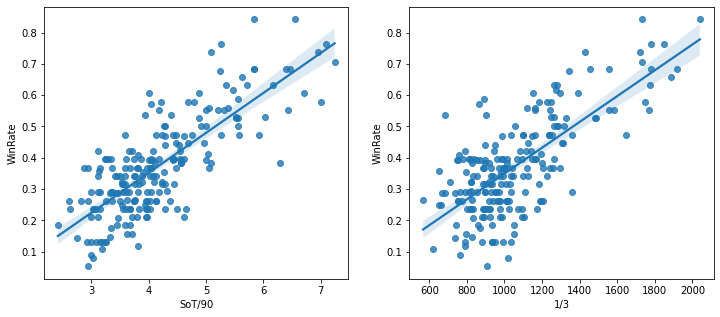

In [ ]:
fig, axis = plt.subplots(1,2, figsize = (12,5))
sns.regplot(x=df['SoT/90'], y=target, ax=axis[0])
sns.regplot(x=df['1/3'], y=target, ax=axis[1])

plt.show()

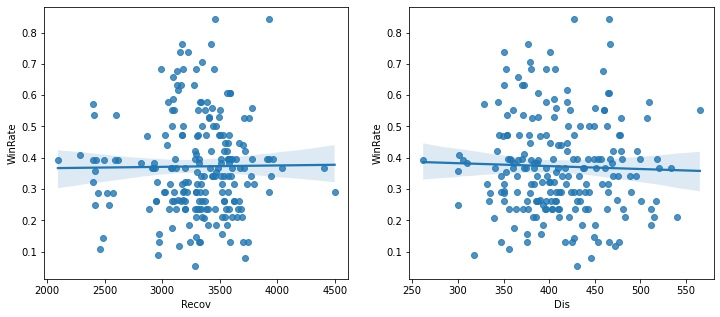

In [ ]:
fig, axis = plt.subplots(1,2, figsize = (12,5))
sns.regplot(x=df['Recov'], y=target, ax=axis[0])
sns.regplot(x=df['Dis'], y=target, ax=axis[1])

plt.show()

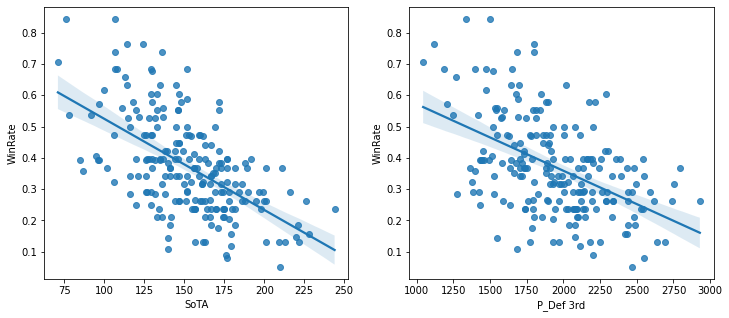

In [ ]:
fig, axis = plt.subplots(1,2, figsize = (12,5))
sns.regplot(x=df['SoTA'], y=target, ax=axis[0])
sns.regplot(x=df['P_Def 3rd'], y=target, ax=axis[1])

plt.show()

In [ ]:
season = '2019-2020'

# Basic Stats
url = 'https://fbref.com/en/comps/Big5/'+season+'/'+season+'-Big-5-European-Leagues-Stats'

response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'html.parser')
tables = soup.find_all(name='table')
for table in tables :
  headers = [th.text for th in table.find_all('th')]

table = tables[0]
headers = [th.text for th in table.find_all('th')]

df_stat = pd.DataFrame(columns=headers[1:20])

for i in table.find_all('tr')[1:] :
  data = i.find_all('td')
  row = [tr.text.strip() for tr in data]
  df_stat.loc[len(df_stat)] = row
  
df_stat = df_stat.set_index('Squad', drop=True).rename_axis(None).sort_index()
df_stat = df_stat.drop(columns=['Country', 'Top Team Scorer',	'Goalkeeper'])
df_stat['Attendance'] = df_stat['Attendance'].str.replace(",", "")
df_stat = df_stat.apply(pd.to_numeric)
df_stat['WinRate'] = df_stat['W']/df_stat['MP']
df_stat = df_stat.drop(columns=['LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90'])

# Goalkeeping Stats
url = 'https://fbref.com/en/comps/Big5/'+season+'/keepers/squads/'+season+'-Big-5-European-Leagues-Stats'

response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'html.parser')
tables = soup.find_all(name='table')
for table in tables :
  headers = [th.text for th in table.find_all('th')]

table = tables[0]
headers = [th.text for th in table.find_all('th')]

df_goalkeep = pd.DataFrame(columns=headers[5:27])

for i in table.find_all('tr')[2:] :
  data = i.find_all('td')
  row = [tr.text.strip() for tr in data]
  df_goalkeep.loc[len(df_goalkeep)] = row

df_goalkeep = df_goalkeep.set_index('Squad', drop=True).rename_axis(None).sort_index()
df_goalkeep = df_goalkeep.drop(columns=['Comp'])
df_goalkeep['Min'] = df_goalkeep['Min'].str.replace(",", "")
df_goalkeep = df_goalkeep.apply(pd.to_numeric)
df_goalkeep = df_goalkeep.drop(columns=['# Pl', 'MP', 'Starts', 'Min', '90s', 'GA', 'GA90', 'W', 'D', 'L'])
df_goalkeep.columns = ['SoTA', 'Saves', 'Save%', 'CS', 'CS%', 'PK_PKatt', 'PKA', 'PKsv', 'PKm', 'PK_Save%']

# Shooting Stats
url = 'https://fbref.com/en/comps/Big5/'+season+'/shooting/squads/'+season+'-Big-5-European-Leagues-Stats'

response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'html.parser')
tables = soup.find_all(name='table')
for table in tables :
  headers = [th.text for th in table.find_all('th')]

table = tables[0]
headers = [th.text for th in table.find_all('th')]

df_shoot = pd.DataFrame(columns=headers[5:26])

for i in table.find_all('tr')[2:] :
  data = i.find_all('td')
  row = [tr.text.strip() for tr in data]
  df_shoot.loc[len(df_shoot)] = row

df_shoot = df_shoot.set_index('Squad', drop=True).rename_axis(None).sort_index()
df_shoot = df_shoot.drop(columns=['Comp'])
df_shoot = df_shoot.apply(pd.to_numeric)
df_shoot = df_shoot.drop(columns=['# Pl', '90s', 'Gls', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG'])

# Passing Stats
url = 'https://fbref.com/en/comps/Big5/'+season+'/passing/squads/'+season+'-Big-5-European-Leagues-Stats'

response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'html.parser')
tables = soup.find_all(name='table')
for table in tables :
  headers = [th.text for th in table.find_all('th')]

table = tables[0]
headers = [th.text for th in table.find_all('th')]

df_pass = pd.DataFrame(columns=headers[8:34])

for i in table.find_all('tr')[2:] :
  data = i.find_all('td')
  row = [tr.text.strip() for tr in data]
  df_pass.loc[len(df_pass)] = row

df_pass = df_pass.set_index('Squad', drop=True).rename_axis(None).sort_index()
df_pass = df_pass.drop(columns=['Comp'])
df_pass = df_pass.apply(pd.to_numeric)
df_pass = df_pass.drop(columns=['# Pl', '90s', 'Ast', 'xA', 'A-xA'])
df_pass.columns = ['T_Cmp', 'T_Att', 'T_Cmp%', 'Pass_TotDist', 'Pass_PrgDist', 'S_Cmp', 'S_Att', 'S_Cmp%', 'M_Cmp', 'M_Att', 'M_Cmp%', 'L_Cmp', 'L_Att', 'L_Cmp%', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog']

# Goal and Shot Creation Stats
url = 'https://fbref.com/en/comps/Big5/'+season+'/gca/squads/'+season+'-Big-5-European-Leagues-Stats'

response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'html.parser')
tables = soup.find_all(name='table')
for table in tables :
  headers = [th.text for th in table.find_all('th')]

table = tables[0]
headers = [th.text for th in table.find_all('th')]

df_gca = pd.DataFrame(columns=headers[7:27])

for i in table.find_all('tr')[2:] :
  data = i.find_all('td')
  row = [tr.text.strip() for tr in data]
  df_gca.loc[len(df_gca)] = row

df_gca = df_gca.set_index('Squad', drop=True).rename_axis(None).sort_index()
df_gca = df_gca.drop(columns=['Comp'])
df_gca = df_gca.apply(pd.to_numeric)
df_gca = df_gca.drop(columns=['# Pl', '90s'])
df_gca.columns = ['SCA', 'SCA90', 'S_PassLive', 'S_PassDead', 'S_Drib', 'S_Sh', 'S_Fld', 'S_Def', 'GCA', 'GCA90', 'G_PassLive', 'G_PassDead', 'G_Drib', 'G_Sh', 'G_Fld', 'G_Def']
df_gca = df_gca.drop(columns=['GCA', 'GCA90', 'G_PassLive', 'G_PassDead', 'G_Drib', 'G_Sh', 'G_Fld', 'G_Def'])

# Defensive Actions Stats
url = 'https://fbref.com/en/comps/Big5/'+season+'/defense/squads/'+season+'-Big-5-European-Leagues-Stats'

response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'html.parser')
tables = soup.find_all(name='table')
for table in tables :
  headers = [th.text for th in table.find_all('th')]

table = tables[0]
headers = [th.text for th in table.find_all('th')]

df_defense = pd.DataFrame(columns=headers[8:35])

for i in table.find_all('tr')[2:] :
  data = i.find_all('td')
  row = [tr.text.strip() for tr in data]
  df_defense.loc[len(df_defense)] = row

df_defense = df_defense.set_index('Squad', drop=True).rename_axis(None).sort_index()
df_defense = df_defense.drop(columns=['Comp'])
df_defense = df_defense.apply(pd.to_numeric)
df_defense = df_defense.drop(columns=['# Pl', '90s'])
df_defense.columns = ['Tkl', 'TklW', 'T_Def 3rd', 'T_Mid 3rd', 'T_Att 3rd', 'D_Tkl', 'D_Tkl+Past', 'Tkl%', 'Past', 'Press', 'Press_Succ', '%', 'P_Def 3rd', 'P_Mid 3rd', 'P_Att 3rd', 'Blocks', 'Block_Sh', 'ShSv', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err']

# Possession Stats
url = 'https://fbref.com/en/comps/Big5/'+season+'/possession/squads/'+season+'-Big-5-European-Leagues-Stats'

response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'html.parser')
tables = soup.find_all(name='table')
for table in tables :
  headers = [th.text for th in table.find_all('th')]

table = tables[0]
headers = [th.text for th in table.find_all('th')]

df_possess = pd.DataFrame(columns=headers[7:36])

for i in table.find_all('tr')[2:] :
  data = i.find_all('td')
  row = [tr.text.strip() for tr in data]
  df_possess.loc[len(df_possess)] = row

df_possess = df_possess.set_index('Squad', drop=True).rename_axis(None).sort_index()
df_possess = df_possess.drop(columns=['Comp'])
df_possess = df_possess.apply(pd.to_numeric)
df_possess = df_possess.drop(columns=['# Pl', '90s'])
df_possess.columns = ['Poss', 'Touches', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen', 'Live', 'Succ', 'Att', 'Succ%', '#Pl', 'Megs', 'Carries', 'TotDist', 'PrgDist', 'Carry_Prog', 'Carry_1/3', 'CPA', 'Mis', 'Dis', 'Targ', 'Rec', 'Rec%', 'Receive_Prog']

# Miscellaneous Stats
url = 'https://fbref.com/en/comps/Big5/'+season+'/misc/squads/'+season+'-Big-5-European-Leagues-Stats'

response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'html.parser')
tables = soup.find_all(name='table')
for table in tables :
  headers = [th.text for th in table.find_all('th')]

table = tables[0]
headers = [th.text for th in table.find_all('th')]

df_misc = pd.DataFrame(columns=headers[5:25])

for i in table.find_all('tr')[2:] :
  data = i.find_all('td')
  row = [tr.text.strip() for tr in data]
  df_misc.loc[len(df_misc)] = row

df_misc = df_misc.set_index('Squad', drop=True).rename_axis(None).sort_index()
df_misc = df_misc.drop(columns=['Comp'])
df_misc = df_misc.apply(pd.to_numeric)
df_misc = df_misc.drop(columns=['# Pl', '90s', 'Int', 'TklW'])

df_test = pd.concat((df_stat, df_goalkeep, df_shoot, df_pass, df_gca, df_defense, df_possess, df_misc), axis=1)

In [ ]:
df_test = df_test.dropna()
target_test = df_test['WinRate']
df_test = df_test.drop('WinRate', axis=1)

In [ ]:
X = df_test
Y = target_test

Y_hat = lm1.predict(X)
print('Train MSE :', mean_squared_error(Y, Y_hat))
print('Train average error :', abs(Y.values - Y_hat).mean())

Train MSE : 0.0014894605387130646
Train average error : 0.029382061787621
